<a href="https://colab.research.google.com/github/Much1r1/AI-Engineer-Roadmap/blob/main/Data_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Loading the dataset (assuming the filename from your screenshot)
df = pd.read_csv('Vehicle_Rental_Company_Financial_Transactions.csv.zip')

# Displaying the first 5 rows
print(df.head())

  License Plate Transaction Type                        Description  Value  \
0       NQT-604         Purchase  Purchase of FIAT - ARGO DRIVE 1.0 -64061   
1       NQT-604           Rental    Rental of FIAT - ARGO DRIVE 1.0   2117   
2       NQT-604           Rental    Rental of FIAT - ARGO DRIVE 1.0   2117   
3       NQT-604           Rental    Rental of FIAT - ARGO DRIVE 1.0   2117   
4       NQT-604           Rental    Rental of FIAT - ARGO DRIVE 1.0   2117   

     Customer Segment  Contract Duration  
0  customer_1  mining                 24  
1  customer_1  mining                 24  
2  customer_1  mining                 24  
3  customer_1  mining                 24  
4  customer_1  mining                 24  


In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop rows where critical info (like Value or License Plate) might be missing
df_cleaned = df.dropna(subset=['Value', 'License Plate'])

# Ensure 'Value' is a float (sometimes currencies have symbols that need stripping)
# df_cleaned['Value'] = df_cleaned['Value'].replace('[\$,]', '', regex=True).astype(float)

License Plate        0
Transaction Type     0
Description          0
Value                0
Customer             0
Segment              0
Contract Duration    0
dtype: int64


In [7]:
# Grouping by Transaction Type to see the total sum of values
type_summary = df_cleaned.groupby('Transaction Type')['Value'].sum()

print("Total Value by Transaction Type:")
print(type_summary)

Total Value by Transaction Type:
Transaction Type
Purchase   -136328006
Rental       88802872
Sale         91415340
Name: Value, dtype: int64


Phase 1: Strategic Notes
What the data represents
This dataset is a transactional ledger for a car rental fleet. It links specific vehicles (via License Plate) to financial events (Rental, Purchase, etc.). It includes both revenue-generating rows (Rentals) and capital expenditure/asset movements (Purchases), evidenced by the negative values shown in your screenshot's histogram.

Questions it could answer later
Utilization Rates: Which specific car models (from the Description column) are being rented most frequently?

Depreciation & ROI: By comparing the Purchase price of a license plate to the sum of its Rental transactions, what is the Return on Investment for a specific vehicle?

Churn/Maintenance Prediction: Can we identify patterns in transaction frequency that suggest a car is due for maintenance or is no longer being utilized?

Seasonality: If a timestamp column is available, when are the peak periods for rental revenue?

/tmp/ipython-input-1063072422.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_data, x='Transaction Type', y='Transaction_Count', palette='viridis')


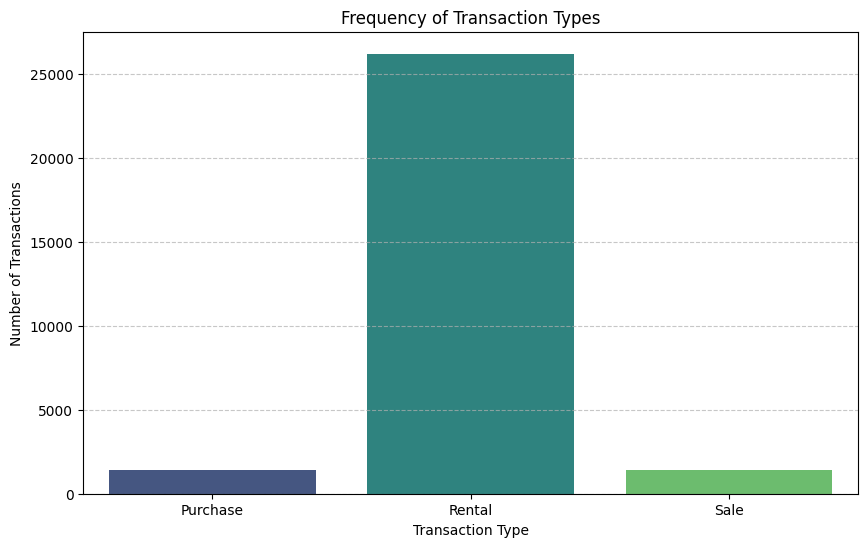

Aggregation Results:
  Transaction Type  Transaction_Count  Total_Value
0         Purchase               1393   -136328006
1           Rental              26228     88802872
2             Sale               1393     91415340


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
# Make sure you've uploaded the file to the 'Files' tab in Colab!
df = pd.read_csv('Vehicle_Rental_Company_Financial_Transactions.csv.zip')

# 2. Basic Cleaning
# Convert 'Value' to numeric (handling potential formatting issues)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df_cleaned = df.dropna(subset=['Value', 'Transaction Type'])

# 3. Aggregation: Volume vs. Value
# We count how many transactions happen vs. the total money moved
agg_data = df_cleaned.groupby('Transaction Type').agg(
    Transaction_Count=('Value', 'count'),
    Total_Value=('Value', 'sum')
).reset_index()

# 4. Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=agg_data, x='Transaction Type', y='Transaction_Count', palette='viridis')
plt.title('Frequency of Transaction Types')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Aggregation Results:")
print(agg_data)

In [9]:
def calculate_vehicle_profitability(dataframe):
    """
    Calculates the net profit/loss for each vehicle in the fleet.
    Returns a sorted DataFrame from most profitable to least.
    """
    # Group by License Plate and sum the Value
    profit_df = dataframe.groupby('License Plate')['Value'].sum().reset_index()

    # Rename column for clarity
    profit_df.rename(columns={'Value': 'Net_Profit_Loss'}, inplace=True)

    # Sort by profit (highest at the top)
    profit_df = profit_df.sort_values(by='Net_Profit_Loss', ascending=False)

    return profit_df

# Execute the function
fleet_performance = calculate_vehicle_profitability(df_cleaned)

# Display the top 10 most profitable vehicles
print("--- Top 10 Most Profitable Vehicles ---")
print(fleet_performance.head(10))

# Display the bottom 5 (likely new purchases not yet paid off)
print("\n--- Vehicles with Highest Investment/Loss ---")
print(fleet_performance.tail(5))

--- Top 10 Most Profitable Vehicles ---
     License Plate  Net_Profit_Loss
971        SGO-201           188287
592        LFX-593           186426
483        JHZ-815           185332
130        COI-793           185152
489        JMG-861           184712
856        QAA-427           184556
1107       UPT-915           173674
126        CMN-654           166390
1079       UEE-793           166282
799        PBN-380           165039

--- Vehicles with Highest Investment/Loss ---
    License Plate  Net_Profit_Loss
739       OBX-621           -15468
692       NDH-258           -15566
171       DGM-478           -16087
441       IOB-433           -17883
667       MSM-884           -18577


In [10]:
import pandas as pd

def engineer_features(df):
    # 1. Extract Brand (The first word of the description)
    df['Brand'] = df['Description'].str.split().str[0]

    # 2. Logic-based Categorization
    def categorize(desc):
        desc = str(desc).upper()
        if 'SUV' in desc or 'DUSTER' in desc or 'COMPASS' in desc:
            return 'SUV'
        elif '1.0' in desc:
            return 'Economy'
        elif '1.6' in desc or '2.0' in desc:
            return 'Intermediate'
        elif 'LUXO' in desc or 'TURBO' in desc:
            return 'Premium'
        else:
            return 'Standard'

    df['Car_Category'] = df['Description'].apply(categorize)

    # 3. Extract Engine Size (Regex to find numbers like 1.0, 1.6, 2.0)
    df['Engine_Size'] = df['Description'].str.extract(r'(\d\.\d)')

    return df

# Apply the transformations
df_featured = engineer_features(df_cleaned)

# Let's see how our app's "Catalog" looks now
catalog_view = df_featured[['Description', 'Brand', 'Car_Category', 'Engine_Size']].drop_duplicates()
print(catalog_view.head(10))

                             Description     Brand  Car_Category Engine_Size
0      Purchase of FIAT - ARGO DRIVE 1.0  Purchase       Economy         1.0
1        Rental of FIAT - ARGO DRIVE 1.0    Rental       Economy         1.0
25         Sale of FIAT - ARGO DRIVE 1.0      Sale       Economy         1.0
26  Purchase of VW-GOL TREND 1.6 FLEX 4P  Purchase  Intermediate         1.6
27    Rental of VW-GOL TREND 1.6 FLEX 4P    Rental  Intermediate         1.6
51      Sale of VW-GOL TREND 1.6 FLEX 4P      Sale  Intermediate         1.6
52   Purchase of HONDA-CIVIC LX 2.0 FLEX  Purchase  Intermediate         2.0
53     Rental of HONDA-CIVIC LX 2.0 FLEX    Rental  Intermediate         2.0
77       Sale of HONDA-CIVIC LX 2.0 FLEX      Sale  Intermediate         2.0
78           Purchase of VW-POLO 1.0 MPI  Purchase       Economy         1.0
